In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_rows = 120
import matplotlib as mpl
import sys
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

<Figure size 640x480 with 0 Axes>

In [2]:
dataset_material = pd.read_excel('Data_Ghiringhelli.xlsx', 'Material Data')
dataset_atomic = pd.read_excel('Data_Ghiringhelli.xlsx',   'Atomic Data')
dataset_atomic.columns = ['Z', 'A', 'IP', 'EA', 'HOMO', 'LUMO', 'rs', 'rp', 'rd', '1D']

### Calculated energy difference between RS and ZB of 82 structures

In [3]:
def spliting_zb_and_rs(dataset):
    dataset_zb1 = dataset[dataset['Classification']=='ZB1']
    dataset_zb2 = dataset[dataset['Classification']=='ZB2']
    dataset_zb3 = dataset[dataset['Classification']=='ZB3']
    dataset_zb  = pd.concat([dataset_zb1,dataset_zb2,dataset_zb3])
    
    dataset_rs1 = dataset[dataset['Classification']=='RS1']
    dataset_rs2 = dataset[dataset['Classification']=='RS2']
    dataset_rs3 = dataset[dataset['Classification']=='RS3']
    dataset_rs  = pd.concat([dataset_rs1,dataset_rs2,dataset_rs3])
    
    dataset_N = dataset[dataset['Classification']=='N']
    return dataset_zb, dataset_rs, dataset_N

In [4]:
import matplotlib.pyplot as plt
from matplotlib  import cm
import numpy as np
#---------------------------------

cmap_blue = mpl.cm.Blues(np.linspace(0,1,20))
cmap_blue = mpl.colors.ListedColormap(cmap_blue[10:,:-1])

cmap_red = mpl.cm.Reds(np.linspace(0,1,20))
cmap_red = mpl.colors.ListedColormap(cmap_red[10:,:-1])

In [5]:
dataset_zb, dataset_rs, dataset_n = spliting_zb_and_rs(dataset=dataset_material)
#---------------------------------
x,y,z            = dataset_material['ZA'].values, dataset_material['ZB'].values, dataset_material['DE']
x_zb, y_zb, z_zb = dataset_zb['ZA'].values, dataset_zb['ZB'].values, dataset_zb['DE'].values
x_rs, y_rs, z_rs = dataset_rs['ZA'].values, dataset_rs['ZB'].values, dataset_rs['DE'].values
x_n, y_n, z_n    = dataset_n['ZA'].values, dataset_n['ZB'].values, dataset_n['DE'].values

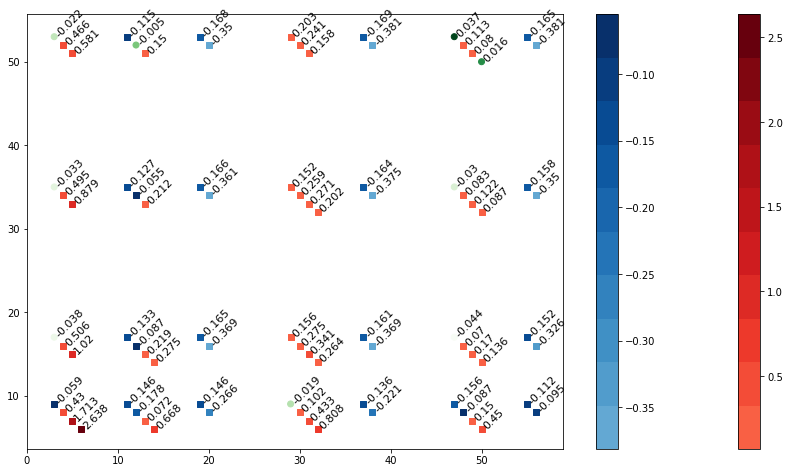

In [6]:

fig, ax = plt.subplots(figsize=(15,8))
im = ax.scatter(x_zb, y_zb, c=z_zb,  cmap=cmap_red, marker = 's')
fig.colorbar(im, ax=ax)
im = ax.scatter(x_rs, y_rs, c=z_rs,  cmap=cmap_blue, marker = 's')
fig.colorbar(im, ax=ax)
im = ax.scatter(x_n, y_n, c=z_n, marker = 'o', cmap=mpl.cm.Greens)
#---------------------------------

for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]), size=11, rotation=45)
    
plt.show()

### Prediction using 1D 2D and 3D descriptor

In [7]:
def get_row(element,dataframe):
    return (dataframe.loc[dataframe['A']==element])

def collecting_1D_descriptor(a,b, dataframe):
    raw_a = get_row(element=a, dataframe=dataframe)
    raw_b = get_row(element=b, dataframe=dataframe)
    
    X_loc = np.abs(raw_a['rs'].values-raw_b['rp'].values) * np.exp(-raw_a['rs'].values)
    Y_loc = np.abs(raw_b['IP'].values-raw_b['EA'].values) / (raw_a['rp'].values)**2
    
    return X_loc[0], Y_loc[0]

def collecting_2D_descriptor(a,b, dataframe):
    raw_a = get_row(element=a, dataframe=dataframe)
    raw_b = get_row(element=b, dataframe=dataframe)
    
    X_loc = np.abs(raw_a['rs'].values-raw_b['rp'].values) * np.exp(-raw_a['rs'].values)
    Y_loc = (np.abs(raw_b['IP'].values-raw_b['EA'].values) / (raw_a['rp'].values)**2)  \
    + (raw_a['rs'].values - raw_b['rp'].values) / np.exp(raw_a['rs'].values)
    
    return X_loc[0], Y_loc[0]

def collecting_3D_descriptor(a,b, dataframe):
    raw_a = get_row(element=a, dataframe=dataframe)
    raw_b = get_row(element=b, dataframe=dataframe)
    
    X_loc = np.abs(raw_a['rs'].values-raw_b['rp'].values) * np.exp(-raw_a['rs'].values) 
    Y_loc = np.abs(raw_b['IP'].values-raw_b['EA'].values) / (raw_a['rp'].values)**2 \
            + (raw_a['rs'].values - raw_b['rp'].values)/np.exp(raw_a['rs'].values) \
            + (raw_b['rp'].values - raw_b['rs'].values)/np.exp(raw_a['rd'].values)
    
    return X_loc[0], Y_loc[0]

In [8]:
def get_row(element,dataframe):
    return (dataframe.loc[dataframe['A']==element])

def collecting_descriptor(a,b, dataframe, dime=1):
    raw_a = get_row(element=a, dataframe=dataframe)
    raw_b = get_row(element=b, dataframe=dataframe)
    
    if dime==1:
        X_loc = np.abs(raw_a['rs'].values-raw_b['rp'].values) * np.exp(-raw_a['rs'].values)
        Y_loc = np.abs(raw_b['IP'].values-raw_b['EA'].values) / (raw_a['rp'].values)**2
        
    elif dime==2:
        X_loc = np.abs(raw_a['rs'].values-raw_b['rp'].values) * np.exp(-raw_a['rs'].values)
        Y_loc = (np.abs(raw_b['IP'].values-raw_b['EA'].values) / (raw_a['rp'].values)**2)  \
        + (raw_a['rs'].values - raw_b['rp'].values) / np.exp(raw_a['rs'].values)
        
    elif dime==3:
        X_loc = np.abs(raw_a['rs'].values-raw_b['rp'].values) * np.exp(-raw_a['rs'].values) 
        Y_loc = np.abs(raw_b['IP'].values-raw_b['EA'].values) / (raw_a['rp'].values)**2 \
                + (raw_a['rs'].values - raw_b['rp'].values)/np.exp(raw_a['rs'].values) \
                + (raw_b['rp'].values - raw_b['rs'].values)/np.exp(raw_a['rd'].values)
    else:
        print('invalid dimension')
        raise
            
    return X_loc[0], Y_loc[0]

In [9]:
def devide_into_parts(dataframe_2D):
    Zb_l = (dataframe_2D[(dataframe_2D['Z']>0.05)&(dataframe_2D['Z']<0.5)])
    Zb_l['Classification'] = 'Zb_l'
    Zb_h = (dataframe_2D[(dataframe_2D['Z']>0.5)])
    Zb_h['Classification'] = 'Zb_h'
    Rs = (dataframe_2D[dataframe_2D['Z']<-0.05])
    Rs['Classification'] = 'Rs'
    Ns = (dataframe_2D[(dataframe_2D['Z']>-0.05) & (dataframe_2D['Z']<0.05)])
    Ns['Classification'] = 'Ns'
    all_frames = [Zb_l,Zb_h,Rs,Ns]
    return all_frames

In [10]:
def preparation_prediction(dataset_material=dataset_material, dataset_atomic=dataset_atomic, dime=2):
    datadict = dict()
    datadict['X'] = []
    datadict['Y'] = []
    datadict['Z'] = []
    datadict['A'] = []
    datadict['B'] = []

    for index, row in dataset_material.iterrows():

            x_loc, y_loc = collecting_descriptor(a=row['A'], b=row['B'], dataframe=dataset_atomic, dime=dime)
            datadict['Z'].append(row['DE'])
            datadict['X'].append(x_loc)
            datadict['Y'].append(y_loc)
            datadict['A'].append(row['A'])
            datadict['B'].append(row['B'])
            
    return datadict

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

def prediction_dict(all_frames):
    
    prediction_array = dict()
    prediction_array['X_train'], prediction_array['y_train'], prediction_array['Z'] = [],[],[]
    prediction_array['prediction'], prediction_array['classification'] = [],[]
    
    for classification in all_frames:
        X = classification.iloc[:,:1].values
        y = classification.iloc[:,1].values
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.0001, random_state=0)
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)
        prediction_array['X_train'].append(X_train.flatten())
        prediction_array['y_train'].append(y_train.flatten())
        prediction_array['prediction'].append(regressor.predict(X_train))
        prediction_array['classification'].append(classification['Classification'])
        prediction_array['Z'].append(np.delete(classification['Z'].values, 
                                               classification[classification['Y']==y_test[0]]['Z']))
        print('coeff',regressor.coef_)
        print('intercept',regressor.intercept_)
        print('RMSE',mean_squared_error(y_train,regressor.predict(X_train)))
        print('------------------------')
        
    return prediction_array

### Linear Regression

In [12]:
# please change here the dataset name if there is any change in name #
    
def action(dimension):
    datadict = preparation_prediction(dataset_material=dataset_material, dataset_atomic=dataset_atomic, dime=dimension)
    data = pd.DataFrame.from_dict(datadict)
    all_frames = devide_into_parts(data);
    data_pred = prediction_dict(all_frames)
    data_pred = pd.DataFrame.from_dict(data_pred)
    return data_pred

In [13]:
data2D = action(dimension=2)

coeff [16.44363768]
intercept 2.9215881097018577
RMSE 1.015333168912222
------------------------
coeff [-96.84008851]
intercept 21.045492862918866
RMSE 24.554225259631952
------------------------
coeff [17.63929624]
intercept -0.9620923526903022
RMSE 0.3964115152620415
------------------------
coeff [15.75006926]
intercept 0.7883274357385215
RMSE 0.40708649179620554
------------------------


C:\Users\UdaykumarGajera\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\UdaykumarGajera\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\UdaykumarGajera\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [14]:
def plotting_with_prediction_line(data_pd):
    for ii in range(len(data_pd)):
        plt.plot(data_pd['y_train'][ii],data_pd['X_train'][ii],'*')
        plt.plot(data_pd['prediction'][ii], data_pd['X_train'][ii],'-')
        plt.xlim(0,8)

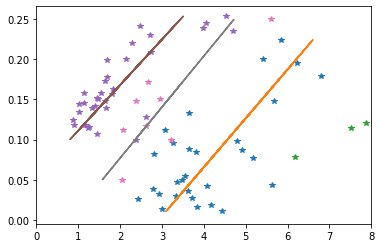

In [15]:
plotting_with_prediction_line(data2D)

### Linear regression with all parameteres

#### Combinding all data

In [16]:
dataset_atomic_array = pd.DataFrame(dataset_atomic).to_numpy()

In [17]:
prop_A, prop_B = [],[]
for index, row in dataset_material.iterrows():
    A = np.where(dataset_atomic_array[:,1]==dataset_material['A'][index])
    B = np.where(dataset_atomic_array[:,1]==dataset_material['B'][index])

    prop_A.append(dataset_atomic_array[A[0][0]][2:])
    prop_B.append(dataset_atomic_array[B[0][0]][2:])        

In [18]:
all_data = dataset_material.copy()

In [19]:
for index,keys in enumerate(dataset_atomic.keys()[2:-1]): #because first two para is A and B which we took care in previous cell
    all_data.insert(4, 'B_{}'.format(keys), [i[index] for i in prop_B], True)
    all_data.insert(4, 'A_{}'.format(keys), [l[index] for l in prop_A], True)

In [21]:
temp = []
for ii in list(all_data['Classification'].values):
    if ii == 'RS1' or ii == 'RS2' or ii == 'RS3':
        temp.append('RS')
    elif ii == 'ZB1' or ii == 'ZB2' or ii == 'ZB3':
        temp.append('ZB')
    elif ii=='N':
        temp.append('N')        

In [22]:
all_data['Classification'] = temp

In [33]:
X = all_data.iloc[:,4:18].values
y = all_data.iloc[:,20:21].values

In [29]:
#to convert catogerical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y[:,0] = labelencoder_y.fit_transform(y[:,0])
#onehotencoder = OneHotEncoder(categorical_features=[0])
#y = onehotencoder.fit_transform(y).toarray()

In [35]:
# checking with 1000 different datasplits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

mse = []
for ii in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=ii)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    '''y_pred_round = [] 
    for i in (y_pred.flatten()):
        y_pred_round.append(int(round(i)))'''
    mse.append(mean_squared_error(y_test,y_pred))

In [36]:
np.average(mse)

0.037576919907335235

In [37]:
for ii in range(len(y_pred)):
    print(y_pred[ii], y_test[ii])

[0.0467925] [-0.019]
[-0.28263861] [-0.146]
[0.06088451] [0.203]
[-0.26250746] [-0.375]
[0.00629524] [-0.033]
[-0.0710481] [0.158]
[1.32906116] [0.879]
[0.02025562] [-0.055]
[-0.22099519] [-0.326]


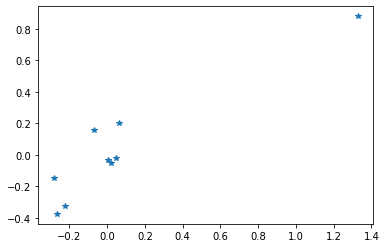

In [38]:
plt.plot(y_pred,y_test,'*')

In [64]:
# linear regression on the above data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=99)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [65]:
mean_squared_error(y_pred,y_test)

0.011325500784870258

### Backward elimination

In [42]:
import statsmodels.regression.linear_model as sm

def back_Elimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        max_var = max(regressor_OLS.pvalues).astype(float)
        if max_var > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == max_var):
                    x = np.delete(x, j, 1)
    print(regressor_OLS.summary())
    return x

In [63]:
#X = np.append(arr=np.ones((len(X),1)).astype(int), values=X, axis=1)
print(len(X[0]))
X_Modeled = back_Elimination(x=X[:, range(15)], sl=0.07)

17
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     23.59
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           3.73e-18
Time:                        12:42:53   Log-Likelihood:                 6.3802
No. Observations:                  82   AIC:                             7.240
Df Residuals:                      72   BIC:                             31.31
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2299      0.295      4.165      

In [45]:
# Here we are trying to get parameters name from the all data
#1. creating dataframe to compare with other dataframe
data_modeled = pd.DataFrame(data=range(len(X_Modeled)))
for i in range(len(X_Modeled[0])):
    data_modeled['X{}'.format(i)] =  X_Modeled[:, i]

del data_modeled[0]
X_Modeled = data_modeled

# comparing both dataframe using values and returing only with the 
# important para
parameter_after_backeli = []
for count_1,item_1 in enumerate(all_data.keys()):
    for count_2,item_2 in enumerate(X_Modeled.keys()):
        if np.all(all_data[item_1].values==X_Modeled[item_2].values):
            parameter_after_backeli.append(item_1)
            print(item_1, '==', item_2)
            
X_Modeled = all_data[parameter_after_backeli];

A_rd == X0
B_rd == X1
B_rp == X2
A_rs == X3
A_HOMO == X4
B_HOMO == X5
B_EA == X6
A_IP == X7


In [46]:
dataset_atomic.keys()

Index(['Z', 'A', 'IP', 'EA', 'HOMO', 'LUMO', 'rs', 'rp', 'rd', '1D'], dtype='object')

In [47]:
#1 making all the possible combination
from itertools import combinations 
for ii in list(combinations(range(len(X_Modeled.keys())), 2)):
    print(X_Modeled.keys()[ii[0]],X_Modeled.keys()[ii[1]])

A_rd B_rd
A_rd B_rp
A_rd A_rs
A_rd A_HOMO
A_rd B_HOMO
A_rd B_EA
A_rd A_IP
B_rd B_rp
B_rd A_rs
B_rd A_HOMO
B_rd B_HOMO
B_rd B_EA
B_rd A_IP
B_rp A_rs
B_rp A_HOMO
B_rp B_HOMO
B_rp B_EA
B_rp A_IP
A_rs A_HOMO
A_rs B_HOMO
A_rs B_EA
A_rs A_IP
A_HOMO B_HOMO
A_HOMO B_EA
A_HOMO A_IP
B_HOMO B_EA
B_HOMO A_IP
B_EA A_IP


### Check with the Polynomial Regression

In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_Modeled)
lin_poly_reg = LinearRegression()
lin_poly_reg.fit(X_poly,y)
print(mean_squared_error(lin_poly_reg.predict(poly_reg.fit_transform(X_Modeled)),y)) 

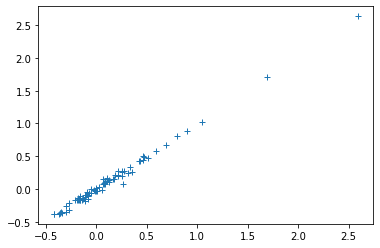

In [60]:
plt.plot(lin_poly_reg.predict(poly_reg.fit_transform(X_Modeled)),y,'+')

### Minimization using scipy

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def compute_X(aa):
    column = ['B_IP','B_EA', 'A_rp']
    X_test = all_data[column].copy()
    X_test[column[0]] = all_data[column[0]]
    X_test[column[1]] = all_data[column[1]]
    X_test[column[2]] = all_data[column[2]]**aa
    return X_test

In [67]:
para_lst,mse,avg_mse = [],[],[]
def loss(initial_parasm):
    para_lst.append(initial_parasm[0])
    X = compute_X(initial_parasm[0])
    for ii in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=ii)
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        mse.append(mean_squared_error(y_test,y_pred))
    avg_mse.append(np.average(mse))
    return np.average(mse)

In [74]:
initial_parasm = [1]

In [ ]:
from scipy.optimize import minimize
minimize(loss, initial_parasm, method=None, tol=1e-3)

In [ ]:
plt.plot(para_lst)

In [ ]:
plt.plot(mse)

In [ ]:
plt.plot(avg_mse)

In [ ]:
avg_mse